#### (1)-
##### The key features of wine quality dataset- 
- fixed acidity-  Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- volatile acidity- Volatile acidity is the gaseous acids present in wine.
- citric acid- It is weak organic acid, found in citrus fruits naturally.
- residual sugar- Amount of sugar left after fermentation.
- chlorides- Amount of salt present in wine.
- free sulfur dioxide- So2 is used for prevention of wine by oxidation and microbial spoilage.
- total sulfur dioxide
- density
- pH-  In wine pH is used for checking acidity
- sulphates- Added sulfides preserve freshness and protect wine from oxidation, and bacteria.
- alcohol- Percent of alcohol present in wine.

In [5]:
import pandas as pd
df= pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1359, 12)

<AxesSubplot: >

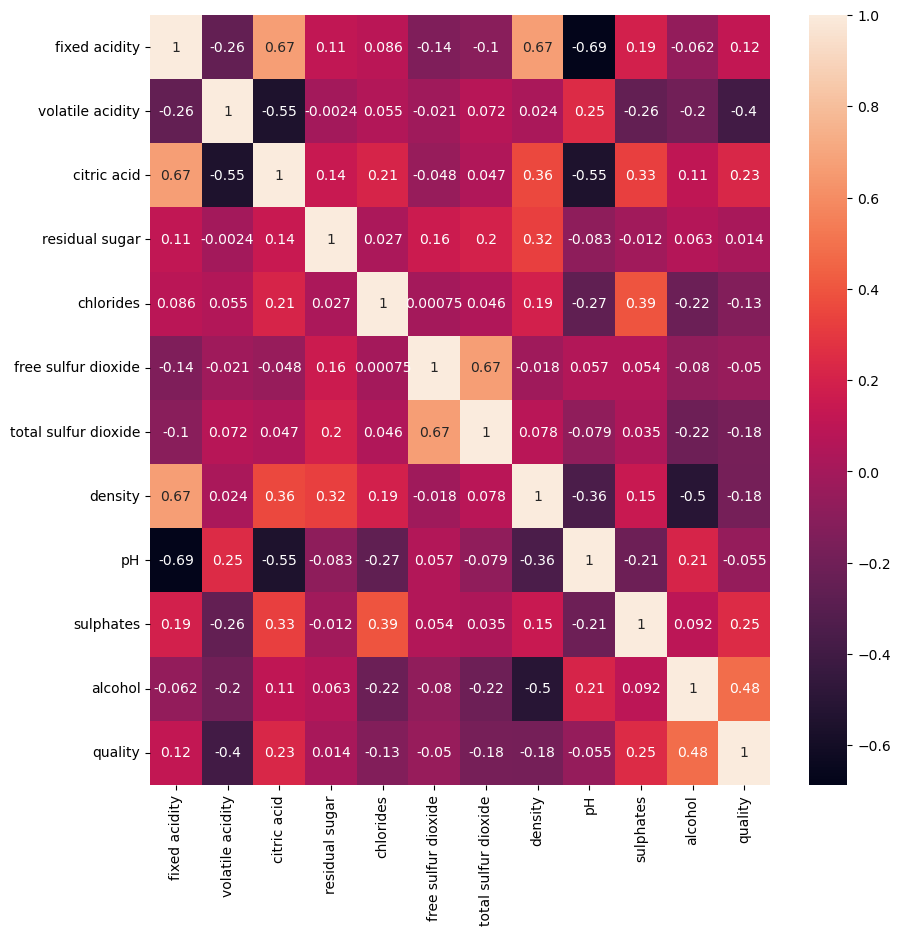

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

##### citric acid, sulphates, alcohol are some of the important features to predict the quality of wine.

#### (2)-
##### We check if there are any missing data present in the red wine dataset.

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### so there are no missing or null values present in the red wine dataset. If there had been, we could handle the missing values using dropna() function, where we can drop some row entries with missing values or columns with missing values, this is called listwise deletion.
- Advantages-
- easy to implement
- no data manipulation needed
- Disadvantages-
- it will lead to huge loss of data
- can lead to bias in dataset if the deleted values belong to one feature
##### so instead we do mean value imputation, median value imputation and mode value imputation.
##### Mean value imputation-
- Advantages-
- retains information
- Disdavantages-
- If our data has outliers, then mean value imputation would not be the right fit for the missing values. 
##### Median value imputation-
- Advantages- 
- retains information
- It is used for data with outliers. 
##### Mode value imputation-
- Advantages-
- We use mode value imputation for columns with categorical data. 
- Disadvantages-
- May lead to over-representation of a particular category.
- Can distort original variable distribution.
##### Statistical values imputation-  In a normally distributed data, one can get all the values that are within 2 standard deviations from the mean. 
- Advantages-
- It fills in the missing values by generating random numbers between (mean — 2 std) & (mean + 2 std)

#### (3)-
##### The key factors that affect student's performance in exams are- lunch, test_preparation_course, race_ethnicity among the categorical features and maths_score, reading_score, writing_score among numerical features.


In [1]:
import pandas as pd
df1= pd.read_csv("stud.csv")
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df1.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [3]:
df1.duplicated().sum()

0

In [4]:
# adding 1 new columns average score which will be the target variable-
df1["average_score"]= (df1["math_score"]+df1["reading_score"]+df1["writing_score"])/3
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


/tmp/ipykernel_77/3593342235.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


<AxesSubplot: >

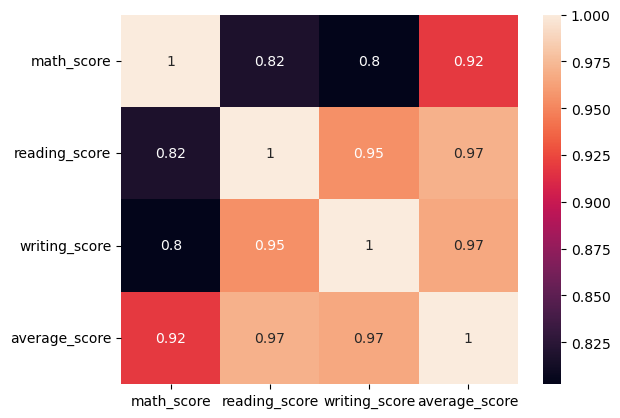

In [5]:
# checking correlation between numerical features-
import seaborn as sns
sns.heatmap(df1.corr(), annot=True)

In [6]:
# so math_score, reading_Score and writing_score are all highly correlated wrt target variable i.e. average_score

In [7]:
#let's perform one hot encoding of the categorical features-
df2= df1.drop(["math_score", "reading_score", "writing_score", "average_score"], axis=1)
df2.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [8]:
df3= pd.get_dummies(df2)
df3.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [9]:
df4= pd.concat([df3, df1[["average_score"]]], axis=1)

<AxesSubplot: >

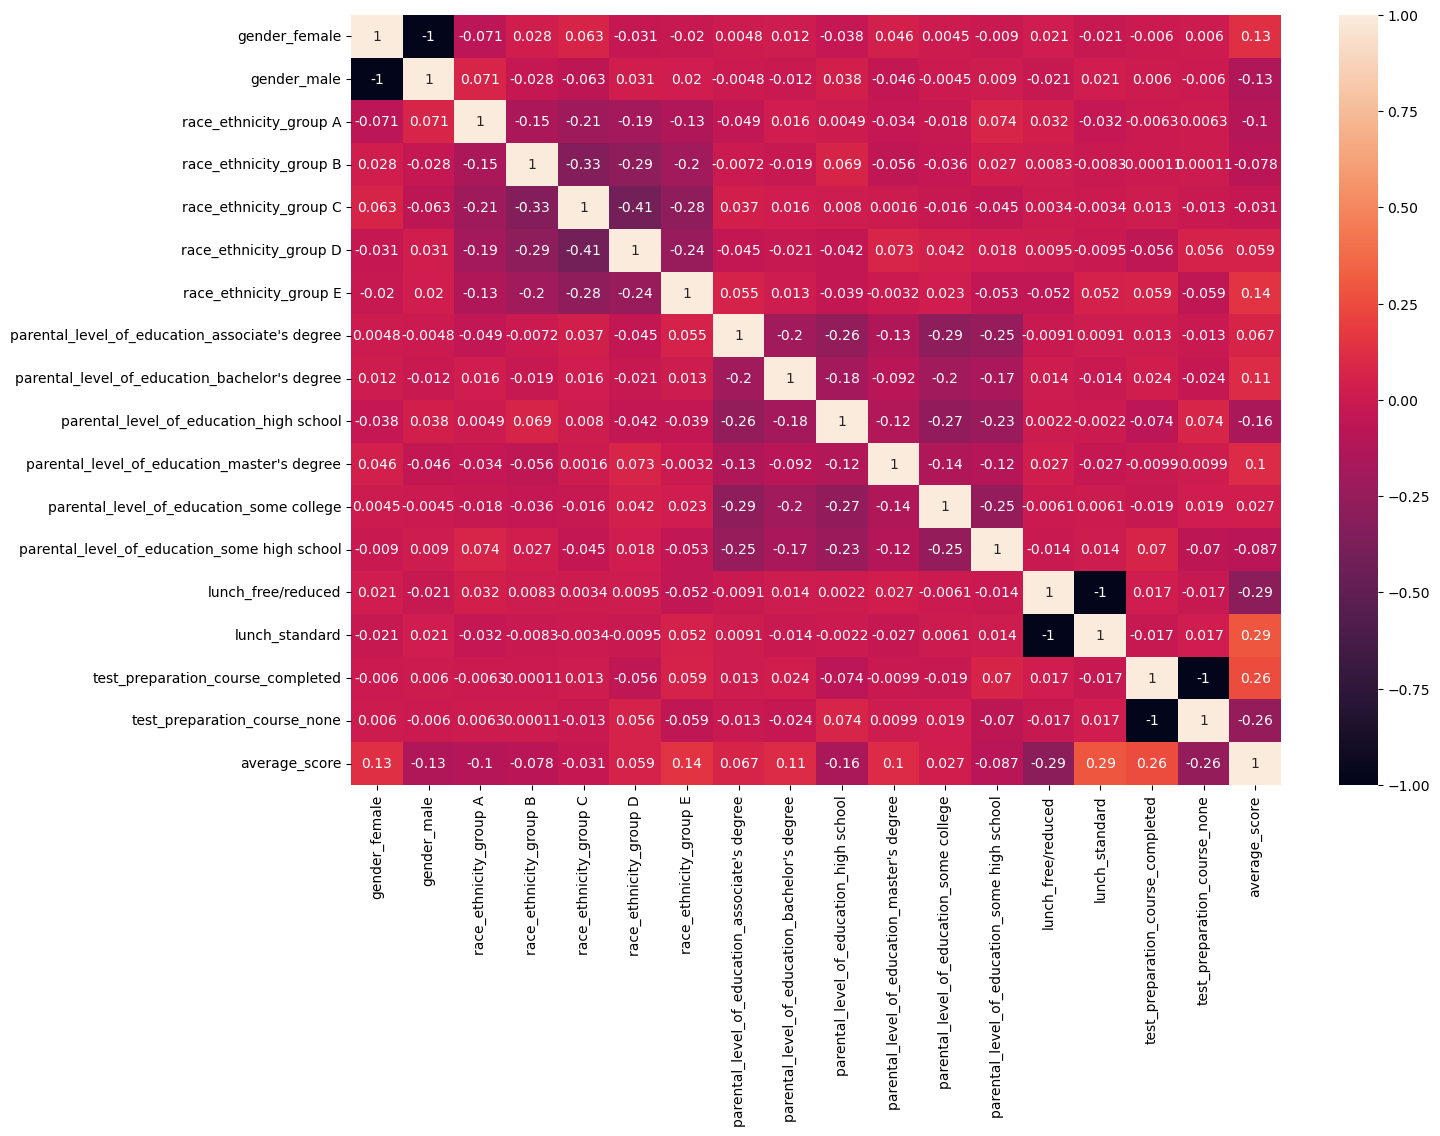

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df4.corr(), annot=True)

#### (4)-
##### The feature engineering things we did for student performance dataset are-
##### We performed EDA on the dataset-
- We checked for missing values- there were no null values
- We checked for duplicate records- there were no duplicates
- We checked the data types of all columns
- We checked the no. of unique values present in each column
- We saw the descriptive statistics of the numerical columns
- We added 2 new numerical columns- total score and average score
- We checked out correlation coefficients of every numerical feature
- We carried out certain visualization plots, where we visualized the distribution of every numerical feature and obtained insights on whether the data is normally distributed or not
- We also obatined insights on the features that affect the average score i.e. target variable the most and found that lunch, test_preparation_course, race_ethnicity, math_score, reading_score, writing_score etc, affect the target variable.

##### Feature selection: We select the variables that are most relevant for predicting exam performance. This could involve examining the correlation between each variable and the target variable (total score), as well as considering domain knowledge and previous research. For example, variables such as math score, reading score, writing score, and test preparation course may be highly relevant for predicting exam performance.

##### Feature transformation: Once the relevant variables have been selected, they may need to be transformed in order to improve their predictive power. This could involve creating new variables from existing ones, such as calculating the average of the math, reading, and writing scores, or creating a binary variable to indicate whether or not a student completed a test preparation course. Other transformations could include scaling or standardizing the variables to ensure that they are on the same scale.

##### As already performed in Q)3) the correlation plots give us a idea about the most important features i.e. those who are correlated with the target variable average_score: Numerical features include- math_score, reading_score, writing_score, Categorical features include- race_ethnicity, lunch, test_preparation_course 
##### We can also perform PCA-

In [11]:
X= pd.concat([df3, df1[["math_score", "reading_score", "writing_score"]]], axis=1)
X.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75


In [12]:
# perform standardization-
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score
0,0.964625,-0.964625,-0.312562,2.064742,-0.684419,-0.59583,-0.403473,-0.534179,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,-0.741881,0.741881,-0.746748,0.746748,0.390024,0.193999,0.391492
1,0.964625,-0.964625,-0.312562,-0.484322,1.461094,-0.59583,-0.403473,-0.534179,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,-0.741881,0.741881,1.339140,-1.339140,0.192076,1.427476,1.313269
2,0.964625,-0.964625,-0.312562,2.064742,-0.684419,-0.59583,-0.403473,-0.534179,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,-0.741881,0.741881,-0.746748,0.746748,1.577711,1.770109,1.642475
3,-1.036672,1.036672,3.199368,-0.484322,-0.684419,-0.59583,-0.403473,1.872032,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,1.347925,-1.347925,-0.746748,0.746748,-1.259543,-0.833899,-1.583744
4,-1.036672,1.036672,-0.312562,-0.484322,1.461094,-0.59583,-0.403473,-0.534179,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,-0.741881,0.741881,-0.746748,0.746748,0.653954,0.605158,0.457333


In [15]:
# perform PCA-
from sklearn.decomposition import PCA
pca= PCA(0.90)
X_pca= pd.DataFrame(pca.fit_transform(X_scaled), columns= pca.get_feature_names_out())
X_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,-0.805066,0.616734,-1.740695,0.547722,-0.631052,1.437003,0.182607,-1.297483,1.759705,-2.147440,-0.564830,-0.735458
1,-2.726042,1.206021,0.245283,1.029230,0.546191,-1.904414,1.680998,0.330018,-0.539593,-0.338558,-0.124234,0.348080
2,-2.751070,0.775092,-2.015478,-0.753522,-0.738248,1.222989,-0.549152,-1.343748,-0.227160,-0.730002,3.260727,1.558765
3,3.209317,-0.531722,0.973517,-0.738754,0.830470,0.993830,-0.957915,1.424770,1.345966,0.580137,-1.060744,2.703246
4,-0.591078,-1.659616,-0.939897,-0.313454,1.386027,-1.662623,1.417731,0.205018,-0.052229,-0.938353,0.629337,0.425656


In [16]:
print("Explained Variance :{}". format(pca.explained_variance_ratio_))

Explained Variance :[0.1737478  0.11045193 0.10201258 0.07841378 0.07165588 0.06582518
 0.06283144 0.06161088 0.05984251 0.05585195 0.05275189 0.05119583]


In [20]:
print("Minimum Number of components required to explain 90% variance is: {}".format(X_pca.shape[1]))

Minimum Number of components required to explain 90% variance is: 12


#### (5)-

In [21]:
import pandas as pd
df= pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df.shape

(1599, 12)

In [24]:
#check for missing values-
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
# There are no missing or null values in any of the features of the dataset

In [26]:
# check for duplicates-
df.duplicated().sum()

240

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(1359, 12)

In [29]:
# so the 240 duplicate records are dropped.

In [30]:
# check datatype of each feature-
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [31]:
# check descriptive statistics-
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
# check no. of unique values-
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<AxesSubplot: >

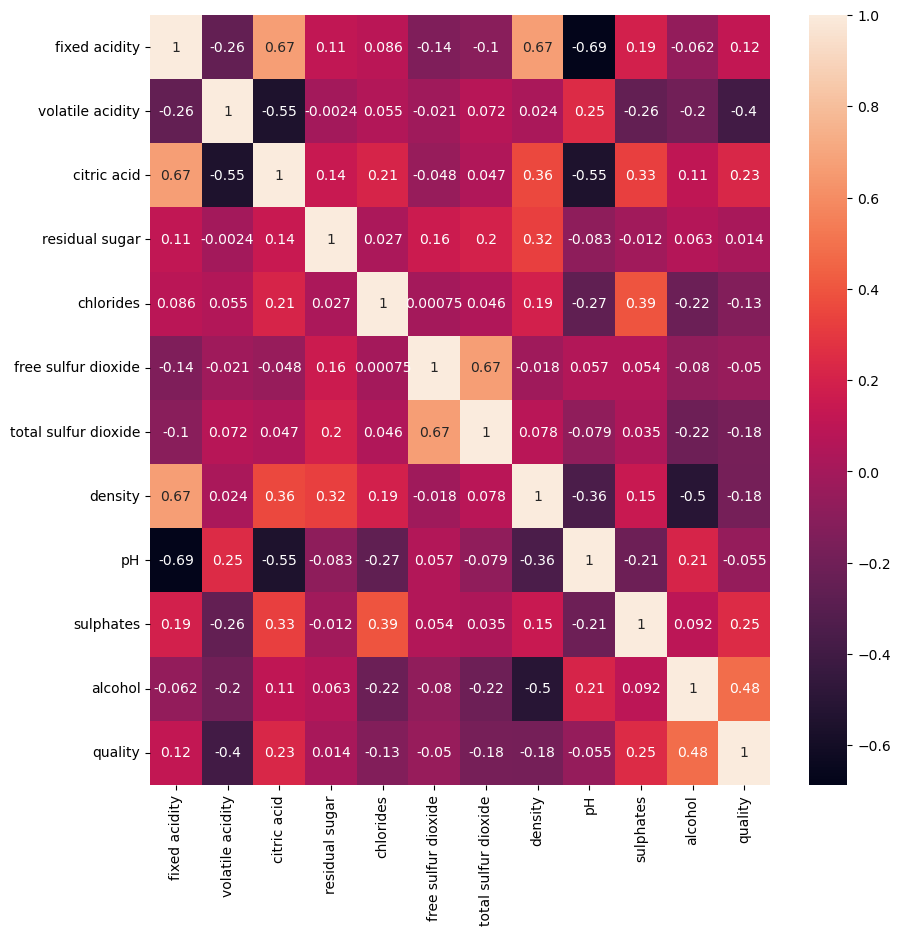

In [34]:
# check correlation-
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [52]:
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

def check_plot(df, feature):
    fig, axis= plt.subplots(1,2, figsize=(6,4))
    plt.subplot(121)
    sns.histplot(x= feature, data= df, kde=True)
    plt.subplot(122)
    stat.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

In [ ]:
check_plot(df, "fixed acidity")

In [ ]:
check_plot(df, "volatile acidity")

In [ ]:
check_plot(df, "citric acid")

In [ ]:
check_plot(df, "residual sugar")

In [ ]:
check_plot(df, "chlorides")

In [ ]:
check_plot(df, "free sulfur dioxide")

In [ ]:
check_plot(df, "total sulfur dioxide")

In [ ]:
check_plot(df, "density")

In [ ]:
check_plot(df, "pH")

In [ ]:
check_plot(df, "sulphates")

In [ ]:
check_plot(df, "alcohol")

##### I did not attach the output of these cells because the file size was too large. But the features that exhibit non-normality are- fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol.

##### To improve normality, we could apply various transformations such as:
- Log transformation: This could be applied to the "residual sugar" feature to reduce the skewness.
- Square root transformation: This could be applied to the "density" feature to reduce the skewness.
- Box-Cox transformation: This is a more general transformation that can be used to transform a variety of non-normal distributions to normality. It involves finding the optimal lambda value that maximizes the log-likelihood of the data under a Box-Cox transformation. The Scipy library in Python provides a function for calculating the Box-Cox transformation.

#### (6)-

In [60]:
import pandas as pd
X= df.drop("quality", axis=1)
Y= df[["quality"]]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [61]:
# perform standardization-
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


In [63]:
# perfrom PCA-
from sklearn.decomposition import PCA
pca= PCA(0.90)
X_pca= pd.DataFrame(pca.fit_transform(X_scaled), columns= pca.get_feature_names_out())
X_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,-1.617185,0.483047,-1.765381,0.043742,0.011270,-0.918062,-0.168433
1,-0.759750,1.851902,-0.870782,0.519611,0.112362,0.917032,-0.935958
2,-0.729912,0.890227,-1.153382,0.383922,0.022574,0.401729,-0.476731
3,2.361030,-0.235496,0.198337,-0.897565,-1.509746,-0.087904,0.307927
4,-1.577087,0.604042,-1.532463,0.035250,-0.166895,-0.993503,-0.125875


In [64]:
print("Explained Variance :{}". format(pca.explained_variance_ratio_))

Explained Variance :[0.28293989 0.17347505 0.14066813 0.11368012 0.08735304 0.05796439
 0.05335491]


In [65]:
print("Minimum Number of components required to explain 90% variance is: {}".format(X_pca.shape[1]))

Minimum Number of components required to explain 90% variance is: 7
